In [3]:
data_list = [5.99342831, 4.7234714 , 6.29537708, 8.04605971, 4.53169325,
4.53172609, 8.15842563, 6.53486946, 4.06105123, 6.08512009]

Write a python/R function that returns the mean, standard deviation and number of elements of a python/R list/vector.

In [2]:
def statistics_calculation(data_list):
    total = sum(data_list)
    mean = total / len(data_list)
    x = 0 # Sum of each element minus the mean squared
    for i in data_list:
        x += (i - mean)**2
    variance = x / (len(data_list) - 1)
    stdev = variance ** 0.5
    return mean, stdev, len(data_list)

mean, stdev, length = statistics_calculation(data_list)
print(f"mean: {mean}, stdev: {stdev}, number of elements: {length}")

mean: 5.896122225, stdev: 1.4460166657016584, number of elements: 10


Given a float array (use the one from the previous problem) and a supplied
“threshold” value, using the function from the functional programming problem,
devise a one sample z-test that tests to see whether the mean value of the
sample exceeds the supplied threshold value (you can use scipy or the package
pingouin for help). Assume that the sample level variance matches the
population-level variance (feel free to conduct a t-test if you want to violate this
assumption). Suppose the threshold here is 4 if using the previous dataset. The
analogy here in bioinformatics is that imagine that as a subcomponent of some 
experiment, we want to see whether the expression of certain genes surpasses a
threshold that carries some previously established diagnostic or prognostic
significance. Let’s call a gene with mean expression greater than the threshold a
“bad” gene. Be prepared to speak to what the p-value means in the context of
your test.

In [3]:
import scipy.stats as stats

# Null Hypothesis: The mean of the list is less than or equal to the threshold
# Alternative Hypothesis: The mean of the list is greater than the threshold

def z_test(data_list, threshold):
    p = 0.05
    mean, stdev, n = statistics_calculation(data_list)
    z_value = (mean - threshold) / (stdev / n ** 0.5)
    p_value = 1 - stats.norm.cdf(z_value)
    if p_value > p:
        print(f"Fail to reject the null hypothesis. The p-value, {p_value}, is greater than {p}. In other words, this gene is \"bad\".")
    else:
        print(f"Reject the null hypothesis. The p-value, {p_value}, is less than {p}. In other words. this gene is \"good\".")
\
threshold = 4
z_test(data_list, threshold)

Reject the null hypothesis. The p-value, 1.6871817879682283e-05, is less than 0.05. In other words. this gene is "good".


We’re going to generate a python class that is able to perform these tests across
many such “genes”. Generate a python/R data class that loads a csv file in its init
method. The csv file will be comprised of a header line containing patient names,
then each subsequent line will first start with a gene name, followed by
“expression” values for each of the patients (this is a gene-by-sample matrix). We
want to see if each of the genes is a “good/bad” gene using the previously
established threshold (this is an unrealistic situation, but designed this way for
simplicity). Define two methods for this class, one that re-implements your
hypothesis test function from the previous section, and the other that calls this
method on each of the lines of the csv, outputting a list of p-values and some
indication of whether the gene was “good” or “bad”. We’ll use the same
expression threshold of 4.

In [7]:
import csv
import scipy.stats as stats


class GeneTesting:
  def __init__(self, file_path):
    self.gene_by_sample_matrix = []
    with open(file_path, mode ='r')as file:
      csvFile = csv.reader(file)
      for lines in csvFile:
        self.gene_by_sample_matrix.append(lines)
  
  def z_test(self, data_list, threshold):
    total = sum(data_list)
    mean = total / len(data_list)

    x = 0
    for i in data_list:
        x += (i - mean)**2
    variance = x / (len(data_list) - 1)
    stdev = variance ** 0.5

    n = len(data_list)

    p = 0.05
    z_value = (mean - threshold) / (stdev / n ** 0.5)
    p_value = float(1 - stats.norm.cdf(z_value))
    if p_value > p:
        return p_value, False
    else:
        return p_value, True
    
  def gene_testing(self, threshold = 4):
    for j in range(1, len(self.gene_by_sample_matrix)):
        data = list(map(float, self.gene_by_sample_matrix[j][1:]))
        p_value, boolean = self.z_test(data, threshold)
        if boolean:
            print(f"{p_value}, bad.")
        else:
            print(f"{p_value}, good.")

test1 = GeneTesting('1_c_d.csv')
test1.gene_testing()

0.018803988146461448, bad.
0.999999999999999, good.
9.588507765556642e-11, bad.
0.9999999999997888, good.
0.9987605666997652, good.
0.5551021766305697, good.
1.0, good.
0.0, bad.


We think that some of the expression of these genes may be correlated, but want
to plot a scatter plot of the two genes expression values across the cohort to see
if this is the case (each axis is each gene’s expression, each point is an
individual). Please write a function or class method that takes as input two lists of
floats, or two of the gene lists from the previous problem, and outputs a
scatterplot of the two gene’s expression across the cohort. Libraries like
matplotlib, seaborn in python and ggplot in R are good for this task.

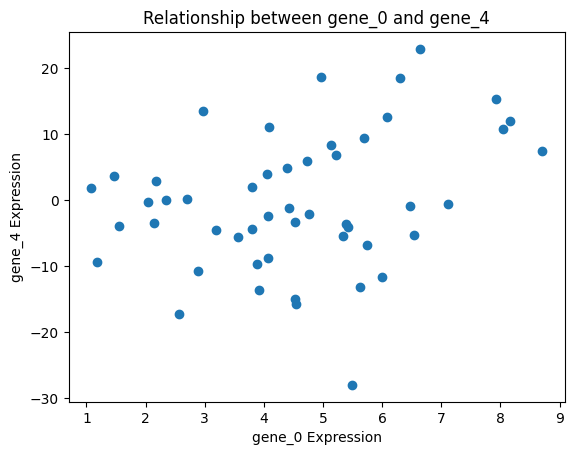

In [26]:
import matplotlib.pyplot as plt

def visualization(x, y, x_gene, y_gene):
    plt.scatter(x, y)

    plt.title("Relationship between " + x_gene + " and " + y_gene)
    plt.xlabel(x_gene + " Expression")
    plt.ylabel(y_gene + " Expression")

    plt.show()

x = list(map(float, test1.gene_by_sample_matrix[1][1:]))
x_gene = test1.gene_by_sample_matrix[1][0]
y = list(map(float, test1.gene_by_sample_matrix[5][1:]))
y_gene = test1.gene_by_sample_matrix[5][0]

visualization(x, y, x_gene, y_gene)